In [1]:
from classes import *
from helpers import *
from shape_functions import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
from IPython.display import HTML
# HTML(ani.to_jshtml())
# HTML(anim.to_html5_video())

### test shape functions 1d -- away from interface

In [3]:
h = 1
xdom = np.linspace(-2*h,2*h,1005)[1:]
ydom = np.linspace(-2*h,2*h,1005)[1:]

In [4]:
x0max = 15
domain = np.linspace(-2*h,x0max+2*h)

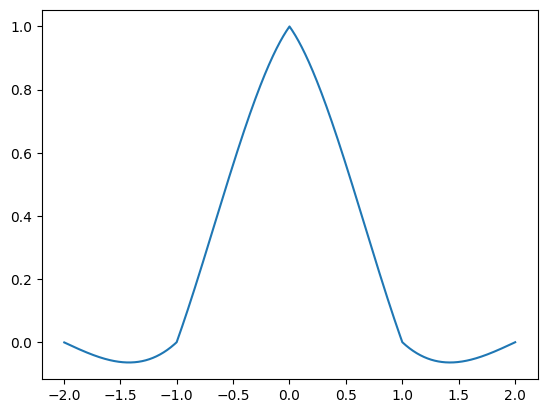

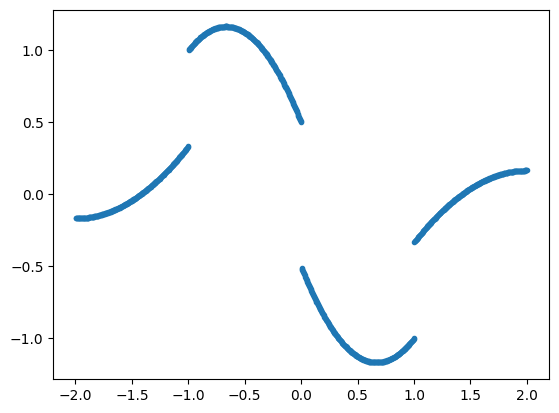

In [5]:
plt.plot(xdom,[phi3(x,h) for x in xdom])
plt.show()

plt.plot(xdom,[phi3_dx(x,h) for x in xdom],'.')
plt.show()

### test 1d shape functions -- near interface

In [6]:
h = 1
xdom = np.linspace(-2*h,2*h,1005)[1:]
ydom = np.linspace(-2*h,2*h,1005)[1:]

x0max = 15
domain = np.linspace(h,x0max-2*h)

In [7]:

line = [[h],[0]]
data = []
for s in np.linspace(0,1,101):
    blocks = []
    for x0 in range(x0max):
        coll = 1-x0%2
        blocks.append((xdom+x0,[phi3_interface(x,h,s,coll) for x in xdom]))
        line[0].append(x0+2*h)
        line[1].append(0)
    data.append(blocks)
line[0].append(x0max-2*h)
line[1].append(0)
ani = animate_2d([line],data,x0max,figsize=(8,3),yesdot=False)

line = [[h],[0]]
data = []
for s in np.linspace(0,1,101):
    blocks = []
    for x0 in range(x0max):
        coll = 1-x0%2
        blocks.append((xdom+x0,[phi3_interface_dy(x,h,s,coll) for x in xdom]))
        line[0].append(x0+2*h)
        line[1].append(0)
    data.append(blocks)
line[0].append(x0max-2*h)
line[1].append(0)
ani_dy = animate_2d([line],data,x0max,figsize=(8,3),yesdot=False)

In [8]:
ani

In [9]:
ani_dy

In [10]:

frames = []
data = []
for s in np.linspace(0,1,101):
    blocks = []
    pou = np.zeros_like(domain)
    for x0 in range(x0max):
        coll = 1-x0%2
        blocks.append((xdom+x0,[phi3_interface_eval(x+x0,h,x0,s) for x in xdom]))
        pou += np.array([phi3_interface_eval(x,h,x0,s) for x in domain])
    data.append(blocks)
    frames.append([domain,pou])
ani_pou = animate_2d(frames,data,x0max,figsize=(8,3),yesdot=False)


In [11]:
ani_pou

### test 2d shape functions -- away from interface

In [3]:
h = 1
func = lambda x,y: phi3_2d(x,y,h)
a = [-2*h,-2*h]
b = [2*h,2*h]
vis_3d_rotate([[[func],[a],[b]]])

In [4]:
h = 1
func = lambda x,y: phi3_2d_eval(x,y,h,2,3)
a = [2-2*h,3-2*h]
b = [2+2*h,3+2*h]
vis_3d_rotate([[[func],[a],[b]]])

In [5]:
h = 1
l_func,l_a,l_b = [], [], []
for x0 in range(4):
    for y0 in range(4):
        func = lambda x,y,x0=x0,y0=y0: phi3_2d_eval(x,y,h,x0,y0)
        a = [x0-2*h,y0-2*h]
        b = [x0+2*h,y0+2*h]
        l_func.append(func)
        l_a.append(a)
        l_b.append(b)
vis_3d_rotate([[l_func,l_a,l_b]])

### test 2d shape functions near interface

In [6]:
h = 1
s = .5
func = lambda x,y: phi3_2d(x,y,h,s,True)
a = [-2*h,-2*h]
b = [2*h,2*h]
vis_3d_rotate([[[func],[a],[b]]])

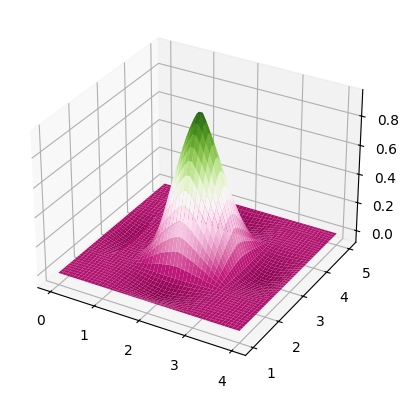

In [11]:
h = 1
func = lambda x,y: phi3_2d_eval(x,y,h,2,3)
a = [2-2*h,3-2*h]
b = [2+2*h,3+2*h]
vis_3d([func],[a],[b])

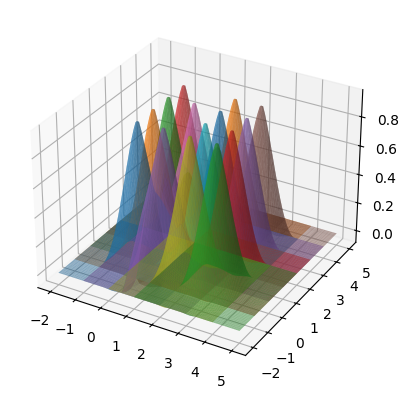

In [12]:
h = 1
l_func,l_a,l_b = [], [], []
for x0 in range(4):
    for y0 in range(4):
        func = lambda x,y,x0=x0,y0=y0: phi3_2d_eval(x,y,h,x0,y0)
        a = [x0-2*h,y0-2*h]
        b = [x0+2*h,y0+2*h]
        l_func.append(func)
        l_a.append(a)
        l_b.append(b)
vis_3d(l_func,l_a,l_b)

### test quadrature

In [2]:
from scipy.integrate import dblquad

In [16]:
def test_quad(f,a,b,c,d,qpn=5):
    func_rev = lambda y,x: f(x,y)
    scipy_val = dblquad(func_rev,a,b,c,d)[0]
    my_val = gauss(f,a,b,c,d,qpn)
    print(scipy_val,my_val,abs(scipy_val-my_val))

In [17]:
func = lambda x,y: np.sin(x)*np.exp(y)+5*x**3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,15)

-220091.86174086106 -220091.86174086184 7.8580342233181e-10


In [18]:
func = lambda x,y: np.sin(x)+5*x**3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,8)

97184.398697734 97184.39869773398 1.4551915228366852e-11


In [19]:
func = lambda x,y: np.sin(x)*np.cos(y)+5*x*gm*3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,8)

97199.57051647456 97199.57051646586 8.702045306563377e-09


In [23]:
func = lambda x,y: x**6*y+5*x**3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,5)

2636619.428571429 2636619.42857143 9.313225746154785e-10


### test next thing

### playing around

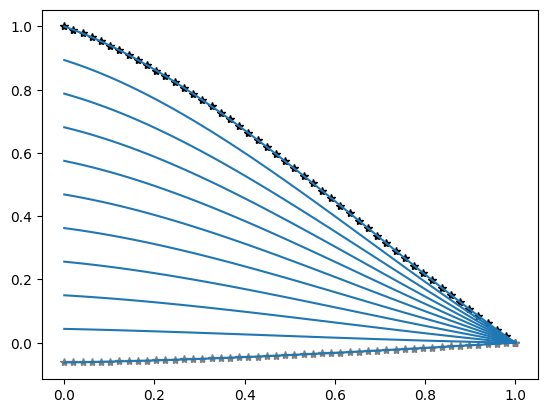

In [21]:
# for non collocated from 0,h 
# want to end up capturing 3h/2,2h

#starting function
fine0 = lambda x: (x+h)*(x-h)*(x-2*h)/2/h**3

#ending function
coarse0 = lambda x: -(x-h)*(x-2*h)*(x-3*h)/6/h**3
#shift and scale so input is still -h,0
shift0 = lambda x: (x+3*h)/2

result0 = lambda x,alpha: alpha*fine0(x)+(1-alpha)*coarse0(shift0(x))

xdom = np.linspace(0,h)
vals_fine0 = [fine0(x) for x in xdom]
vals_coarse0 = [coarse0(shift0(x)) for x in xdom]

plt.plot(xdom,vals_fine0,'k*')
plt.plot(xdom,vals_coarse0,'*',c='grey')
for alpha in np.linspace(0,1,11):
    vals = [result0(x,alpha) for x in xdom]
    plt.plot(xdom,vals,'C0')
plt.show()

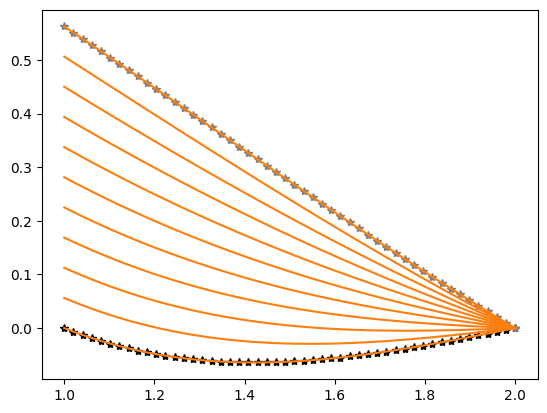

In [22]:
# for collocated from h,2h 
# want to end up capturing h/2,h

#starting function
fine = lambda x: -(x-h)*(x-2*h)*(x-3*h)/6/h**3

#ending function
coarse = lambda x: (x+h)*(x-h)*(x-2*h)/2/h**3
#shift and scale so input is still -h,0
shift = lambda x: x/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(h,2*h)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
for alpha in np.linspace(0,1,11):
    vals = [result(x,alpha) for x in xdom]
    plt.plot(xdom,vals,'C1')
plt.show()

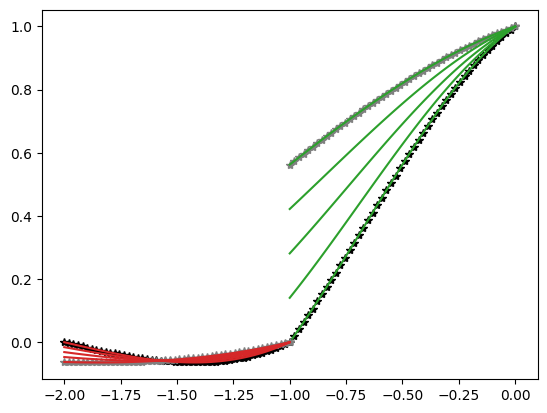

In [23]:
# the other two for testing
# for collocated from -h,0
# want to end up capturing -h/2,0

#starting function
fine = lambda x: -(x+2*h)*(x+h)*(x-h)/2/h**3

#ending function
coarse = lambda x: fine(x)
#shift and scale so input is still -h,0
shift = lambda x: x/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(-h,0)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
for alpha in np.linspace(0,1,5):
    vals = [result(x,alpha) for x in xdom]
    plt.plot(xdom,vals,'C2')

# for collocated from -2h,-h 
# want to end up capturing -3h/2,-h

#starting function
fine = lambda x: (x+3*h)*(x+2*h)*(x+h)/6/h**3

#ending function
coarse = lambda x: fine(x)
#shift and scale so input is still -h,0
shift = lambda x: (x-h)/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(-2*h,-h)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
for alpha in np.linspace(0,1,5):
    vals = [result(x,alpha) for x in xdom]
    plt.plot(xdom,vals,'C3')
plt.show()

1
2
3
4
5


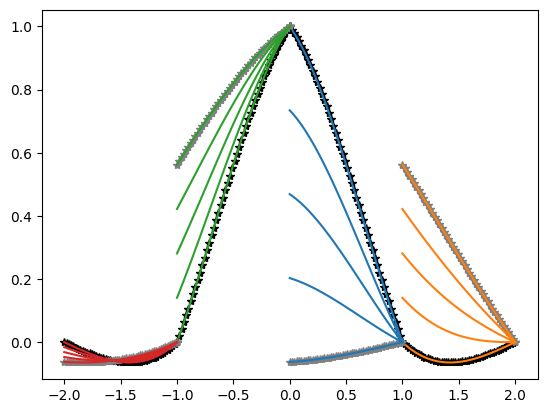

In [30]:
sums = [np.linspace(0,1)*0 for _ in range(7)]

# for collocated from h,2h 
# want to end up capturing h/2,h

#starting function
fine = lambda x: -(x-h)*(x-2*h)*(x-3*h)/6/h**3

#ending function
coarse = lambda x: (x+h)*(x-h)*(x-2*h)/2/h**3
#shift and scale so input is still -h,0
shift = lambda x: x/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(h,2*h)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]
sums[0] += np.array(vals_coarse)
sums[-1] += np.array(vals_fine)

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
ind = 1
for alpha in np.linspace(0,1,5):
    vals = [result(x,alpha) for x in xdom]
    sums[ind] += np.array(vals)
    ind += 1
    plt.plot(xdom,vals,'C1')

# for non collocated from -h,0 
# want to end up capturing -2h,-3h/2

#starting function
fine0 = lambda x: (x+h)*(x-h)*(x-2*h)/2/h**3

#ending function
coarse0 = lambda x: -(x-h)*(x-2*h)*(x-3*h)/6/h**3
#shift and scale so input is still -h,0
shift0 = lambda x: (x+3*h)/2

result0 = lambda x,alpha: alpha*fine0(x)+(1-alpha)*coarse0(shift0(x))

xdom = np.linspace(0,h)
vals_fine0 = [fine0(x) for x in xdom]
vals_coarse0 = [coarse0(shift0(x)) for x in xdom]
sums[0] += np.array(vals_coarse0)
sums[-1] += np.array(vals_fine0)

plt.plot(xdom,vals_fine0,'k*')
plt.plot(xdom,vals_coarse0,'*',c='grey')
ind = 1
for alpha in np.linspace(0,1,5):
    vals = [result0(x,alpha) for x in xdom]
    print(ind)
    sums[ind] += np.array(vals)
    ind += 1
    plt.plot(xdom,vals,'C0')

# the other two for testing
# for collocated from -h,0
# want to end up capturing -h/2,0

#starting function
fine = lambda x: -(x+2*h)*(x+h)*(x-h)/2/h**3

#ending function
coarse = lambda x: fine(x)
#shift and scale so input is still -h,0
shift = lambda x: x/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(-h,0)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]
sums[0] += np.array(vals_coarse)
sums[-1] += np.array(vals_fine)

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
ind = 1
for alpha in np.linspace(0,1,5):
    vals = [result(x,alpha) for x in xdom]
    sums[ind] += np.array(vals)
    ind += 1
    plt.plot(xdom,vals,'C2')

# for collocated from -2h,-h 
# want to end up capturing -3h/2,-h

#starting function
fine = lambda x: (x+3*h)*(x+2*h)*(x+h)/6/h**3

#ending function
coarse = lambda x: fine(x)
#shift and scale so input is still -h,0
shift = lambda x: (x-h)/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(-2*h,-h)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]
sums[0] += np.array(vals_coarse)
sums[-1] += np.array(vals_fine)

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
ind = 1
for alpha in np.linspace(0,1,5):
    vals = [result(x,alpha) for x in xdom]
    sums[ind] += np.array(vals)
    ind += 1
    plt.plot(xdom,vals,'C3')
plt.show()

In [13]:
int(-.5)

0